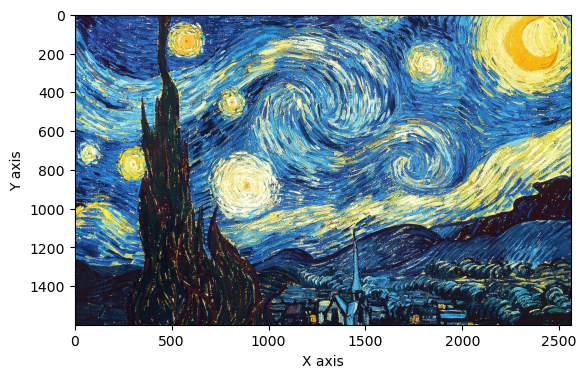

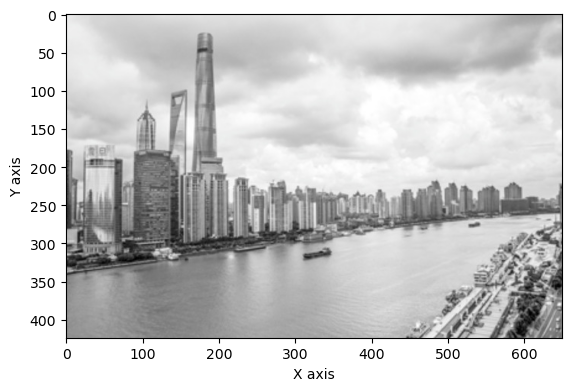

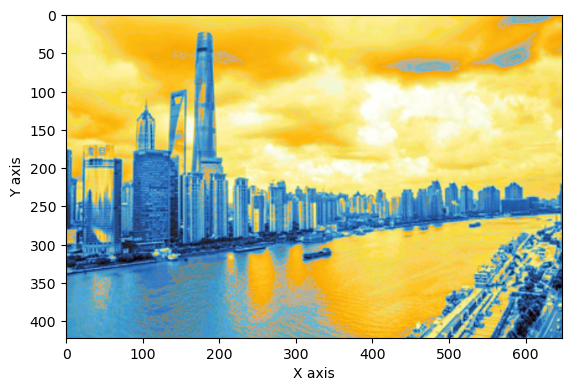

In [2]:
# 图像色彩风格迁移

# KNN 回归器
import os

import matplotlib.pyplot as plt
import numpy as np
# 图像输入输出
from skimage import io
# 图像通道转换
from skimage.color import rgb2lab, lab2rgb
from sklearn.neighbors import KNeighborsRegressor

block_size = 1


def read_style_image(file_name, size=block_size):
    # 读取图像，得到X->Y的映射
    # 其中X为3*3灰度值的平均， Y为对应的中心像素格的色彩
    img = io.imread(file_name)
    plt.imshow(img)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

    img = rgb2lab(img)
    w, h = img.shape[0], img.shape[1]

    X = []
    Y = []
    for x in range(size, w - size):
        for y in range(size, h - size):
            X.append(img[x - size:x + size + 1, y - size:y + size + 1, 0].flatten())
            Y.append(img[x, y, 1:])
    return X, Y


def rebuild(img, size=block_size):
    plt.imshow(img)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

    img = rgb2lab(img)
    w, h = img.shape[0], img.shape[1]
    X = []
    for x in range(size, w - size):
        for y in range(size, h - size):
            X.append(img[x - size:x + size + 1, y - size:y + size + 1, 0].flatten())
    X = np.array(X)
    pred_ab = knn.predict(X).reshape(w - 2 * size, h - 2 * size, -1)
    photo = np.zeros([w, h, 3])
    photo[:, :, 0] = img[:, :, 0]
    photo[size:w - size, size:h - size, 1:] = pred_ab
    photo = photo[size: w - size, size: h - size, :]
    return photo


X, Y = read_style_image(os.path.join('style_transfer', 'style.jpg'))

knn = KNeighborsRegressor(n_neighbors=4, weights='distance')
knn.fit(X, Y)

content = io.imread(os.path.join('style_transfer', 'input.jpg'))
new_photo = rebuild(content)

# 为了展示图像，我们将其再转换为RGB表示
new_photo = lab2rgb(new_photo)

fig = plt.figure()
plt.imshow(new_photo)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()
